# **USED CARS DaTA IN MARKET - ANALYSIS**
---



In [ ]:
## IMPORT ALL THE NECESSARY LIBRARIES TO WORK WITH ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Import the CSV File ##

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('used_car_dataset.csv')
df.head()

Saving used_car_dataset.csv to used_car_dataset.csv


,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


# **Now We Need to Clean the Dataset, Change it as per our Requirements.**

---



In [ ]:
## Here are the columns of the dataset ##
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

In [ ]:
df.head() ## Give data of the starting rows

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [ ]:

df.info() ## information about the dataset

## We need to Convert 'AskPrice' and 'kmDriven' data type to integer ##


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [ ]:
## Finding the Null Values in the dataset ##

df.isnull().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,47
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


In [ ]:
## Dropping the NA values from the Dataset ##

df = df.dropna(subset='kmDriven').reset_index(drop=True)

In [ ]:
## Making the object type into integer ##

df['kmDriven'] = df['kmDriven'].str.replace('km','').str.replace(',','').str.strip().apply(lambda x: int(float(x)))

df['AskPrice'] = df['AskPrice'].str.replace('₹','').str.replace(',','').str.strip().apply(lambda x: int(x))

## Here we are removing rupee sign, km sign, and commas from the given data
## and change its data type. So that, we can use this data for analysing

# Convert 'PostedDate' to datetime
df['PostedDate'] = pd.to_datetime(df['PostedDate'], format='%b-%y')


In [ ]:
for col in df.columns:
  if col == 'AdditionInfo':
    df.rename(columns={col : 'Additional Info'}, inplace=True)
  if col == 'kmDriven':
    df.rename(columns={col : 'Car Driven (in kms)'}, inplace=True)
  if col == 'AskPrice':
    df.rename(columns={col : 'Ask Price'}, inplace=True)
  if col == 'Year':
    df.rename(columns={col : 'Year of Manufacture'}, inplace=True)



# We are changing the Name of the Columns for
# better understanding of the Dataset
# for that we use for loop and rename the columns as shown above.


In [ ]:
df.tail()

,Brand,model,Year of Manufacture,Age,Car Driven (in kms),Transmission,Owner,FuelType,PostedDate,Additional Info,Ask Price
9530,Skoda,Octavia,2014,10,105904,Automatic,second,Diesel,2024-10-01,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel",1040000
9531,Maruti Suzuki,Alto-800,2020,4,55000,Manual,first,Hybrid/CNG,2024-11-01,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...",375000
9532,Maruti Suzuki,Ritz,2013,11,92000,Manual,first,Diesel,2024-11-01,"Maruti Suzuki Ritz VDi, 2013, Diesel",415000
9533,Hyundai,Verna,2019,5,72000,Automatic,first,Petrol,2024-10-01,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol",855000
9534,Hyundai,New i20,2021,3,83228,Manual,second,Petrol,2024-11-01,"Hyundai New i20 1.2 Asta IVT, 2021, Petrol",699000


In [ ]:
df.describe()

## Describe gives us count, mean, standard deviation,
## minimum, maximum of the given data in the dataset

,Year,Age
count,9535.000000,9535.000000
mean,2016.375669,7.624331
std,4.071090,4.071090
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000




---
**There are total of 9535 rows and 11 columns in this Dataset**


---



1) Year of Manufacture :-
  Mean - 2016.37 (Average of the Cars are from 2016-17), Standard Deviation - 4.0710, Variance - 16.5737,
  Max - 2024 (There's some latest cars also),
  Min - 1986 (Some Retro Collection).


---



2) Age of the Car :-
  Mean - 7.6243 (Average of the Car is Around 7-8 yrs old),
  year of manufacture has a negative correlation with age of the car.


---



3) Car Driven :- Mean - 70605.8914 (Average Used Car is Driven around 7 to 8 thousands of kilometers), There's a Car which is not even drive for a kilometer,
and some Cars drove around 1 lac kilometers.


---






# ***UNIVARIATE ANALYSIS***

---



In [ ]:
Car_brands_repeating = df['Brand'].value_counts() ## By doing value_counts() it sort the data and gives us in descending order
                                                  ## it helps us for getting the most selling cars in the market

top_10_brands = Car_brands_repeating.head(10)     ## by using head() we get the top 10 brands which is selling the most cars

top_10_companies = df[df['Brand'].isin(top_10_brands.index)] ## we are making a dataframe for the top 10 brands to use it in analysis
                                                             ## basically we're just seeing is best selling cars is available in our
                                                                ## Dataset if yes then it added in dataframe



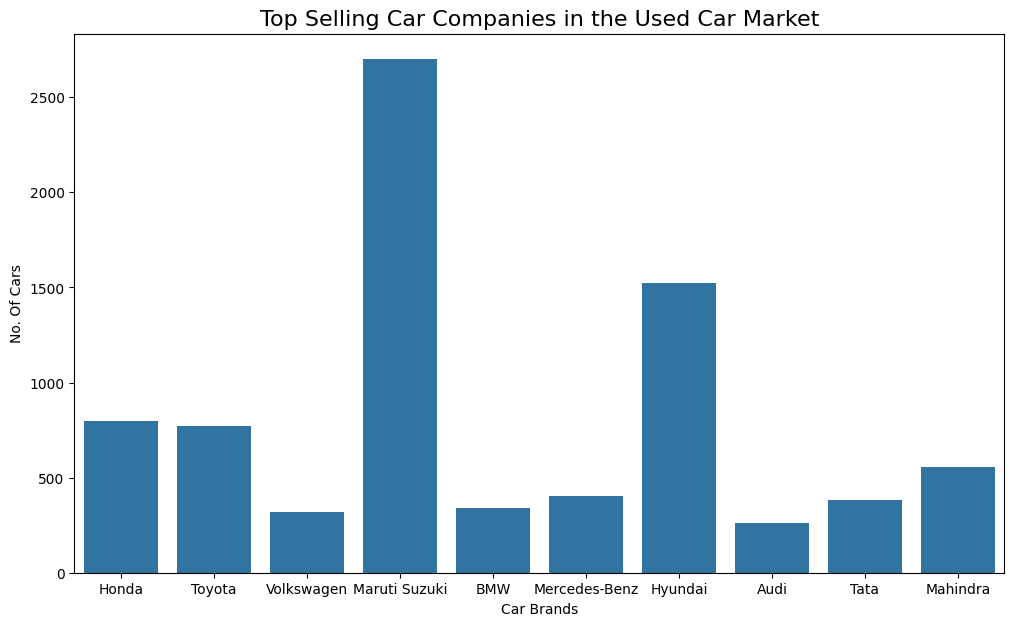

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(data = top_10_companies, x = 'Brand')
plt.title('Top Selling Car Companies in the Used Car Market', fontsize = 16)
plt.xlabel('Car Brands')
plt.ylabel('No. Of Cars')
plt.show()


## This Analysis Shows us which company is selling their most cars in the
## used car market by doing a countplot we can see that Maruti Suzuki is
## the most selling brand in the market...

This Analysis Shows us Which brands cars are mostly listed for the Used Card Market. This is done after analysing and filtering data we got to know the top 10 most selling companies brand in the given dataset. We can see **Maruti Suzuki** has the most listed Cars in the Given Data.

<ipython-input-14-a070bdc7df56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Transmission', palette=['red', 'orange'])


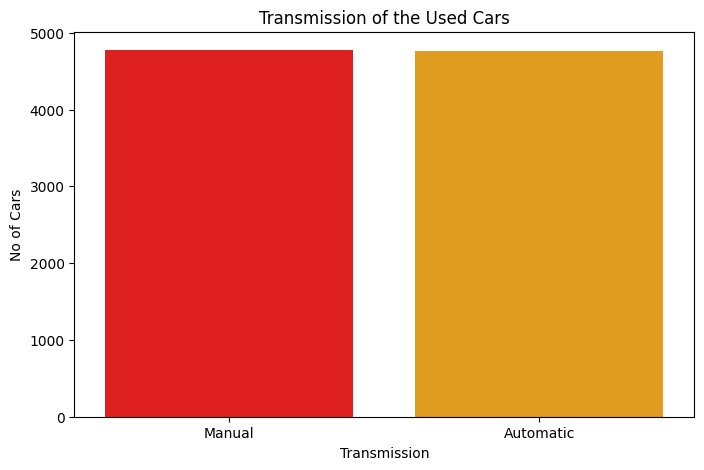

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'Transmission', palette=['red', 'orange'])
plt.title('Transmission of the Used Cars')
plt.xlabel('Transmission')
plt.ylabel('No of Cars')
plt.show()

## This Count Plot Gives us Transmission(Manual and Automatic) Cars
## in the Used Car Market.


In [ ]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,4774
Automatic,4761


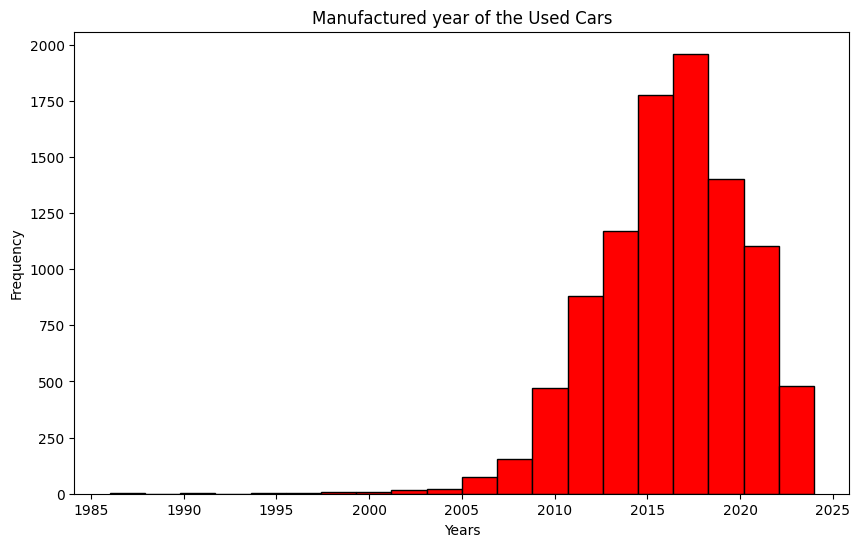

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Year of Manufacture'], bins=20, color='red',edgecolor='black')
plt.title('Manufactured year of the Used Cars')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

## This Data shows us in which year most cars are manufactured.

By This we get to know That most of the cars in the used cars market are Manufactured between 2015-2020, mainly in 2016. The Average of the Dataset is 2016 (approx.).

In [ ]:
df['Owner'].value_counts()

,count
Owner,
first,4783
second,4752


<ipython-input-19-5e4aeb74f3b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Owner', palette = ['gold','salmon'] )


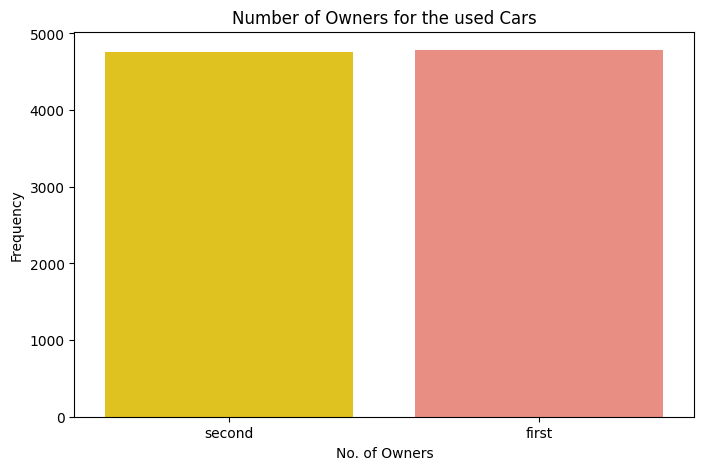

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'Owner', palette = ['gold','salmon'] )
plt.title('Number of Owners for the used Cars')
plt.xlabel('No. of Owners')
plt.ylabel('Frequency')
plt.show()

## This Data shows how many cars have how many Number of Owner
## before listing in the Used Car Market (first hand and second hand)

In [ ]:
df['FuelType'].value_counts()

,count
FuelType,
Diesel,3828
Petrol,3802
Hybrid/CNG,1905


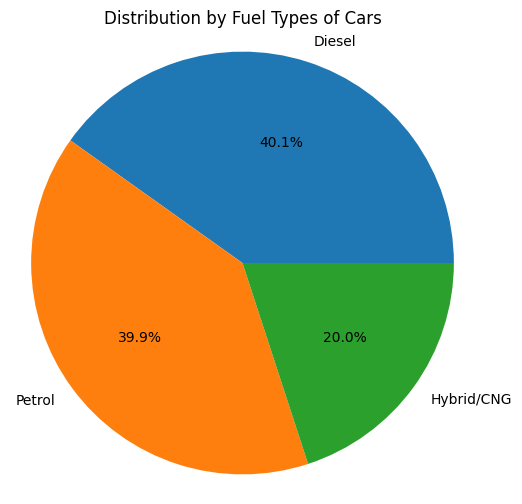

In [ ]:
fuel_type_counts = df['FuelType'].value_counts() # Gives types of Fueltype with their count number

plt.figure(figsize=(6, 6))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution by Fuel Types of Cars')
plt.axis('equal')
plt.show() ## This shows that there are more diesel cars in compare to Petrol and Cng
            ## in the used car market


## This Data gives us the number of Cars having Different types
## of Fuel Emission used in it.
## (Petrol, Diesel, Hybrid/Cng)

By this PieChart, We get to know that there are more Diesel cars in the used Cars market as compared to the Petrol and Hybrid/CNG. Diesel and Petrol Cars are having a slight difference only.

In [ ]:
best_selling_models = df['model'].value_counts().head(12) ## By doing value_counts() it sort the data and gives us in descending order
                                                          ## it helps us for getting the most selling car models in the market
                                                          ## by using head() we get the top 12 cars model selling in market

best_selling = df[df['model'].isin(best_selling_models.index)] ## we are making a dataframe for the top 10 brands to use it in analysis
                                                                ## basically we're just seeing is best selling models is available in our
                                                                ## Dataset if yes then it added in dataframe

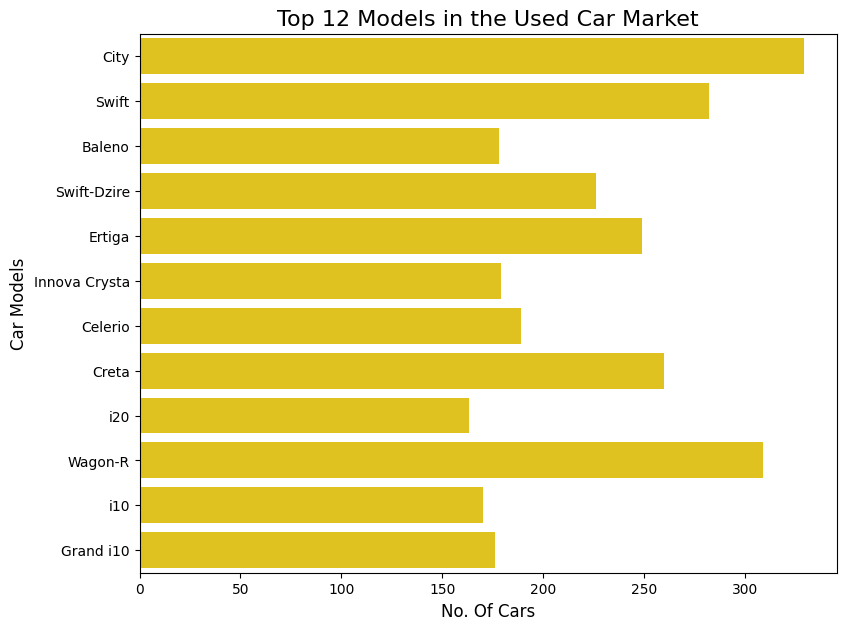

In [ ]:
plt.figure(figsize = (9,7))
sns.countplot(data = best_selling, y = 'model', color = 'gold')
plt.title('Top 12 Models in the Used Car Market', fontsize = 16)
plt.xlabel('No. Of Cars', fontsize = 12)
plt.ylabel('Car Models', fontsize = 12)
plt.show()

## From this Data we Can see the Car models which is selling the most in the used Card Market

In This CountPlot, we got top 12 Car Models those are in high sales except other models in the Datasets, we first filter the data for the cars then make a barplot for getting highest car models sold. From the above Dataset we get to know tha Honda City is the highest selling car in the Used Car Market.

In [ ]:
df['Ask Price'].mean()

1067161.451074987

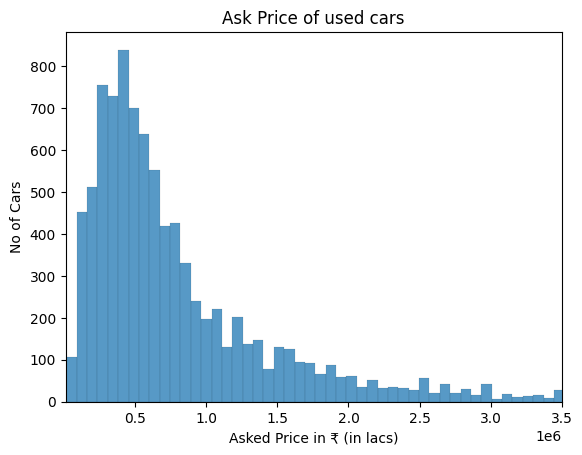

In [ ]:
sns.histplot(df['Ask Price'])
plt.xlim(10000, 3500000)
plt.title('Ask Price of used cars')
plt.xlabel('Asked Price in ₹ (in lacs)')
plt.ylabel('No of Cars')
plt.show()

In this Plot, We can see most of the listed Cars have the value between 250000 to 100000. The Mean for the Ask Prices for listed cars is **1067161.451074987**

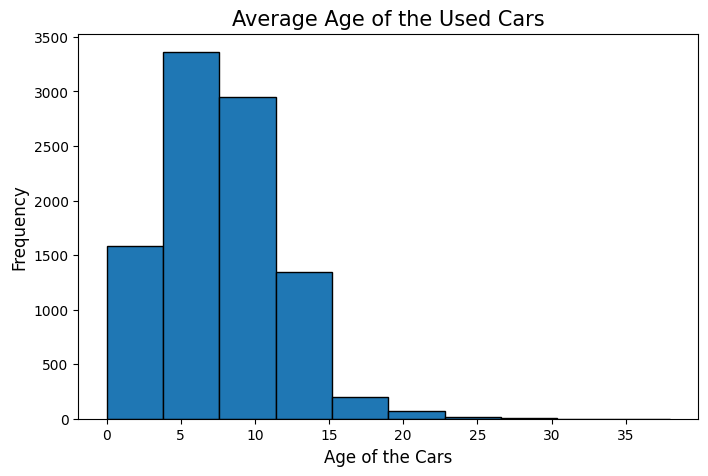

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(data = df, x = 'Age', edgecolor = 'black')
plt.title('Average Age of the Used Cars', fontsize = 15)
plt.xlabel('Age of the Cars', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

# ***Bi-Variate Analysis***

---



In [ ]:
df.head()

,Brand,model,Year of Manufacture,Age,Car Driven (in kms),Transmission,Owner,FuelType,PostedDate,Additional Info,Ask Price
0,Honda,City,2001,23,98000,Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...",195000
1,Toyota,Innova,2009,15,190000,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",375000
2,Volkswagen,VentoTest,2010,14,77246,Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",184999
3,Maruti Suzuki,Swift,2017,7,83500,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,565000
4,Maruti Suzuki,Baleno,2019,5,45000,Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",685000


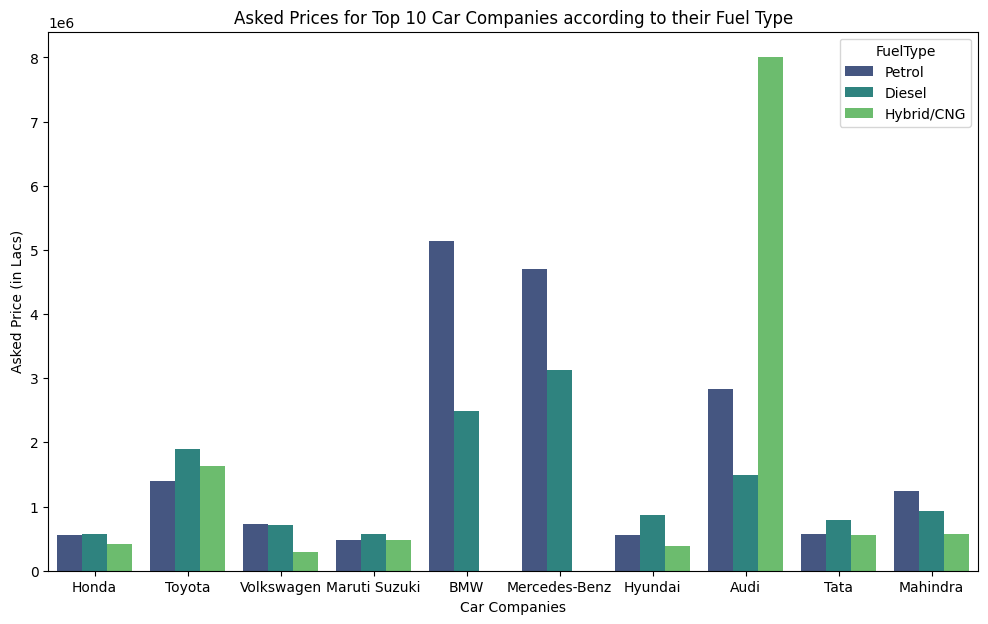

In [ ]:
plt.figure(figsize = (12,7))
sns.barplot(data = top_10_companies, x = 'Brand', y = 'Ask Price', hue = 'FuelType', palette = 'viridis',errorbar=None)
plt.title('Asked Prices for Top 10 Car Companies according to their Fuel Type')
plt.xlabel('Car Companies')
plt.ylabel('Asked Price (in Lacs)')
plt.show()

<ipython-input-124-42b25dcbafcf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_companies, x = 'Brand',y = 'Car Driven (in kms)', palette = 'viridis',errorbar=None)


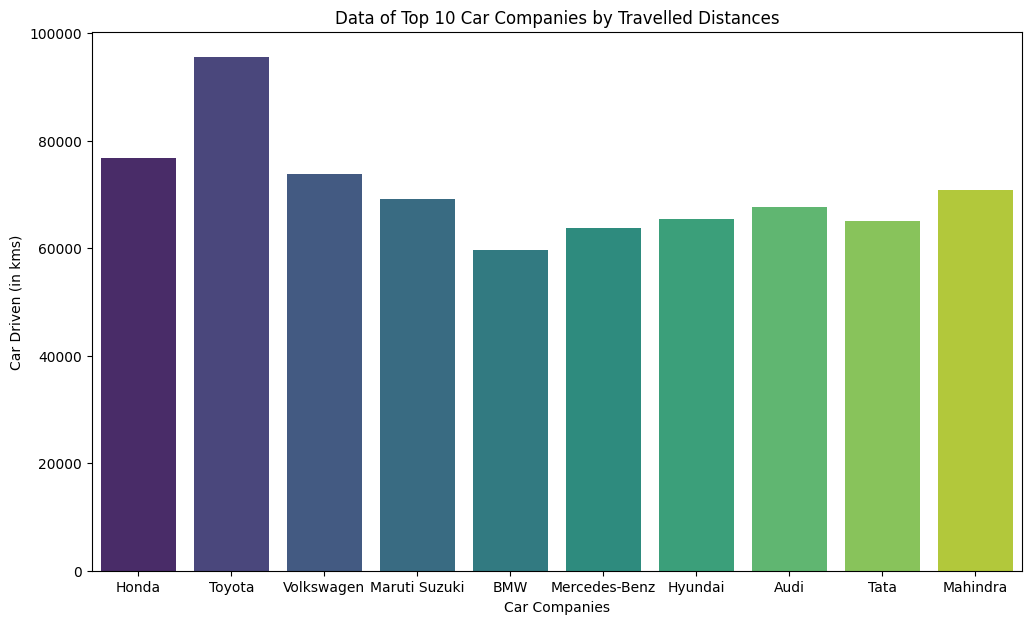

In [ ]:
plt.figure(figsize = (12,7))
sns.barplot(data = top_10_companies, x = 'Brand',y = 'Car Driven (in kms)', palette = 'viridis',errorbar=None)
plt.title('Data of Top 10 Car Companies by Travelled Distances')
plt.xlabel('Car Companies')
plt.ylabel('Car Driven (in kms)')
plt.show()


Text(0, 0.5, 'Car Driven (in kms)')

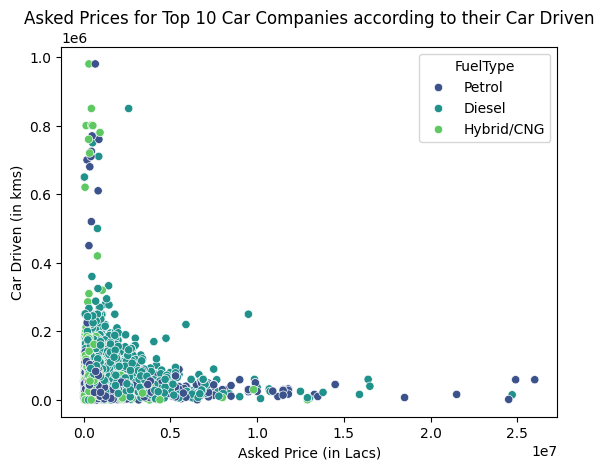

In [ ]:
sns.scatterplot(data = top_10_companies, x = 'Ask Price', y = 'Car Driven (in kms)', hue = 'FuelType', palette = 'viridis')
plt.title('Asked Prices for Top 10 Car Companies according to their Car Driven')
plt.xlabel('Asked Price (in Lacs)')
plt.ylabel('Car Driven (in kms)')

By Doing the ScatterPlot, we can saw that when the Prices are low it was all because of the Car was Driven many kilometers, when one variable is low the other one is high that means Asked Price (in lacs) is inversely proportional to Car Driven(in kms).

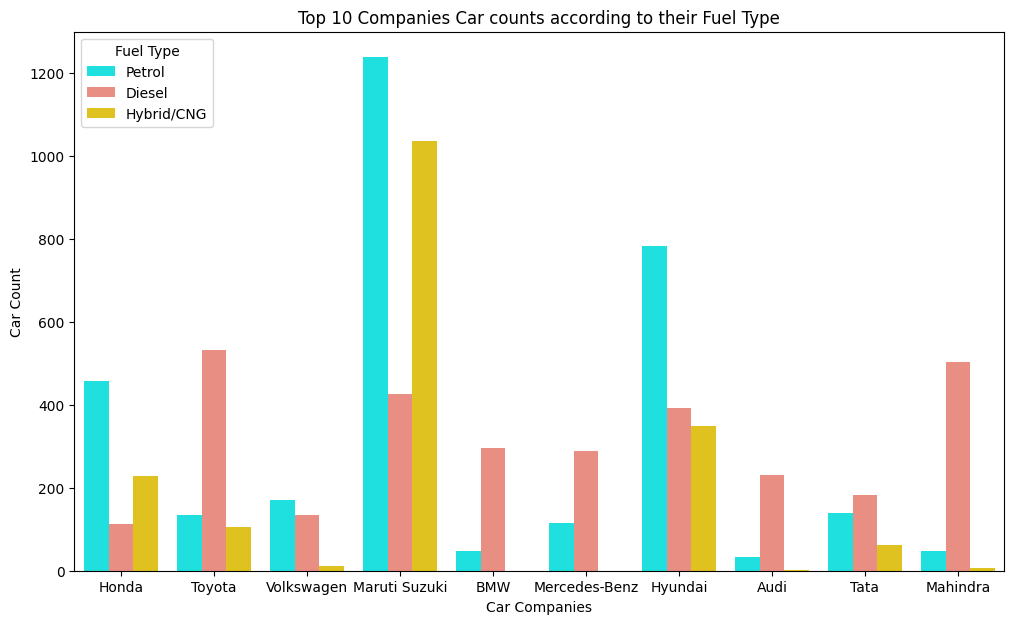

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(data = top_10_companies, x = 'Brand', hue = 'FuelType', palette = ['cyan','salmon','gold'] )


plt.xlabel('Car Companies')
plt.ylabel('Car Count')
plt.title('Top 10 Companies Car counts according to their Fuel Type')
plt.legend(title = 'Fuel Type', loc = 'upper left')
plt.show()

<ipython-input-121-feb119b9e07a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Owner', y = 'Age', palette = 'viridis')


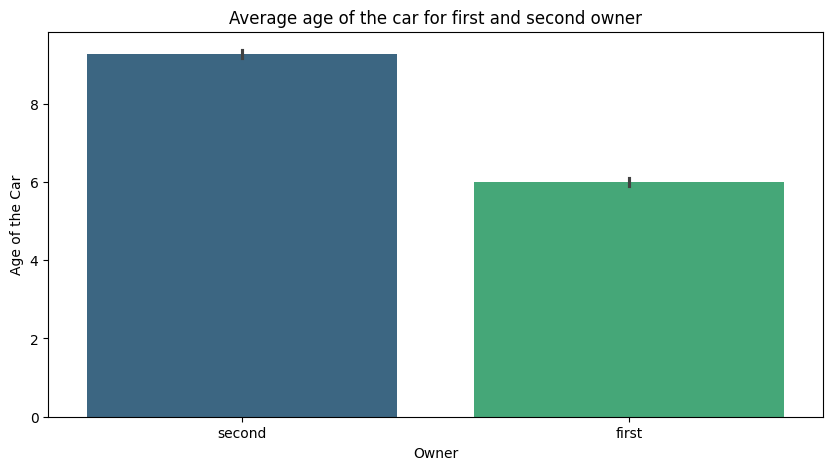

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = 'Owner', y = 'Age', palette = 'viridis')
plt.title('Average age of the car for first and second owner')
plt.xlabel('Owner')
plt.ylabel('Age of the Car')
plt.show()

# **Trend Analysis**

---



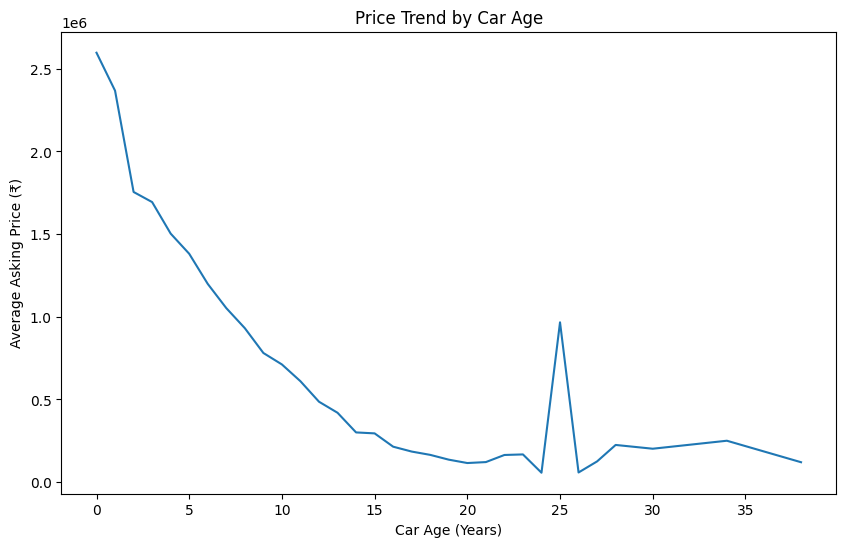

In [ ]:
price_trend_by_age = df.groupby('Age')['Ask Price'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=price_trend_by_age, x='Age', y='Ask Price')
plt.title('Price Trend by Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Average Asking Price (₹)')
plt.show()

## This Data Shows that if the Car Age is less, then the asked price was
## more than the price asked when the car's age is more, but we can see one
## spike at 25 years where the price is higher than the normal data.


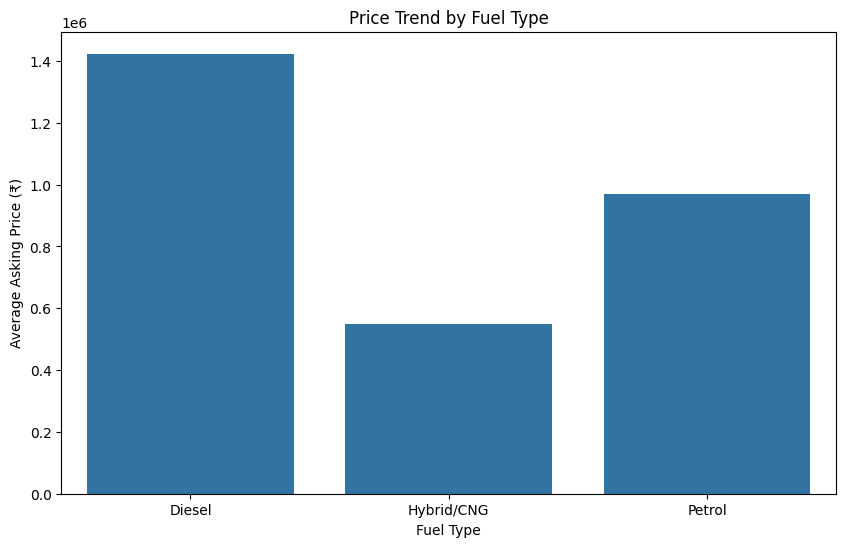

In [ ]:
price_trend_by_fueltype = df.groupby('FuelType')['Ask Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=price_trend_by_fueltype, x='FuelType', y='Ask Price')
plt.title('Price Trend by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Asking Price (₹)')
plt.show()

<ipython-input-47-4c925aca2fa7>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  listings_trend = df.set_index('PostedDate').resample('M').size()


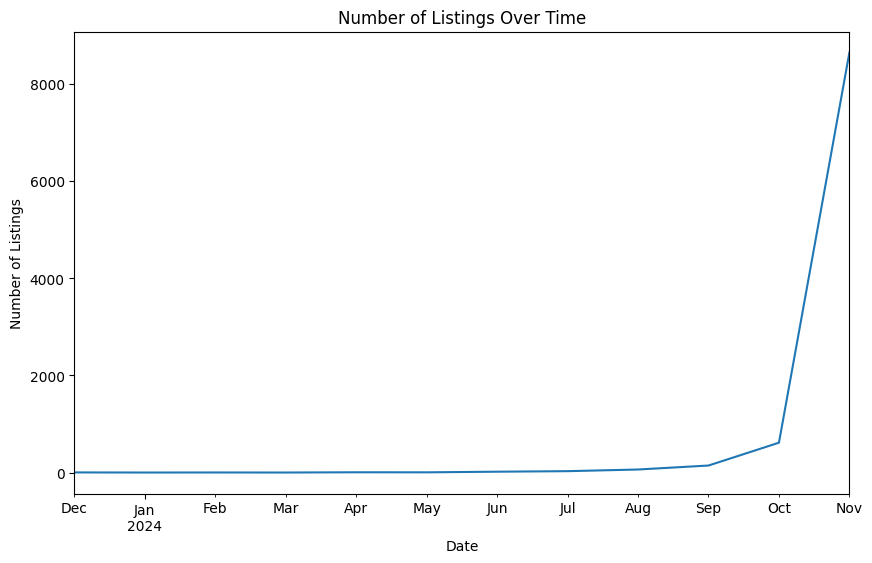

In [ ]:
listings_trend = df.set_index('PostedDate').resample('M').size()


plt.figure(figsize=(10, 6))
listings_trend.plot(kind='line')
plt.title('Number of Listings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.show()

## This plot gives us the number of cars listing during the time period

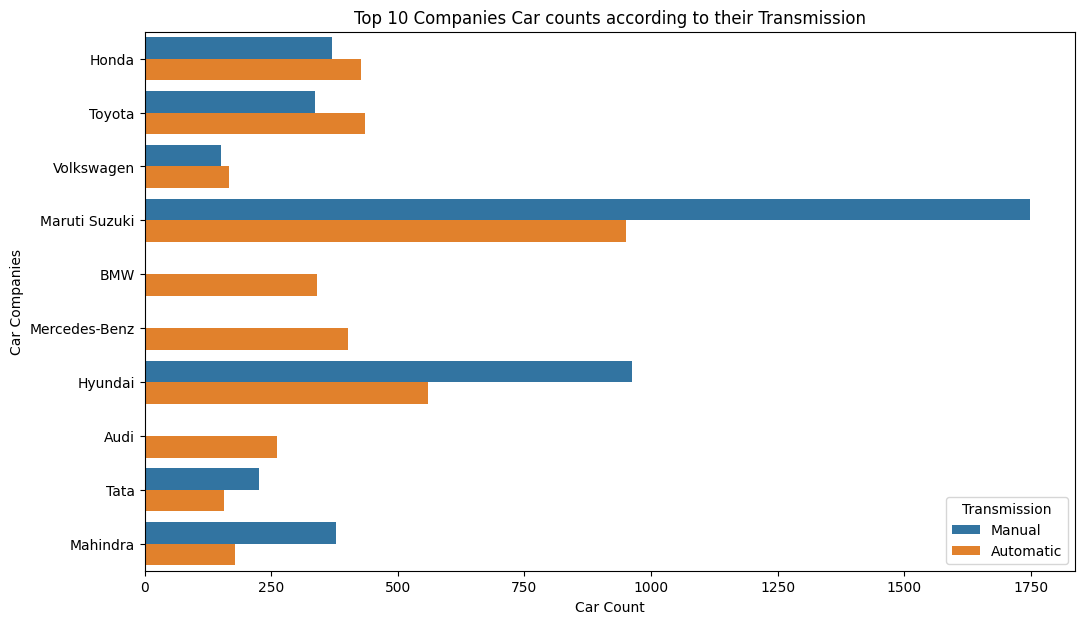

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(data = top_10_companies, y = 'Brand', hue = 'Transmission' )
# plt.ylim(10000, 9000000)

plt.xlabel('Car Count')
plt.ylabel('Car Companies')
plt.title('Top 10 Companies Car counts according to their Transmission')
plt.legend(title = 'Transmission', loc = 'lower right')
plt.show()

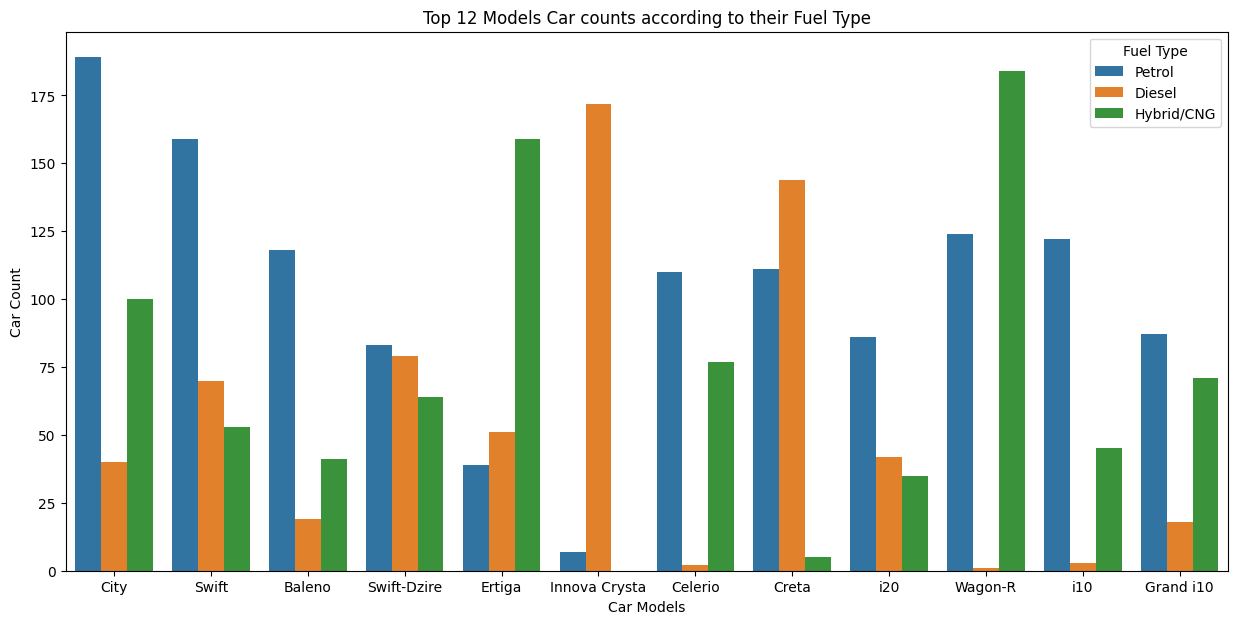

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = best_selling, x = 'model', hue = 'FuelType' )
plt.title('Top 12 Models Car counts according to their Fuel Type')
plt.xlabel('Car Models')
plt.ylabel('Car Count')
plt.legend(title = 'Fuel Type', loc = 'upper right')
plt.show()

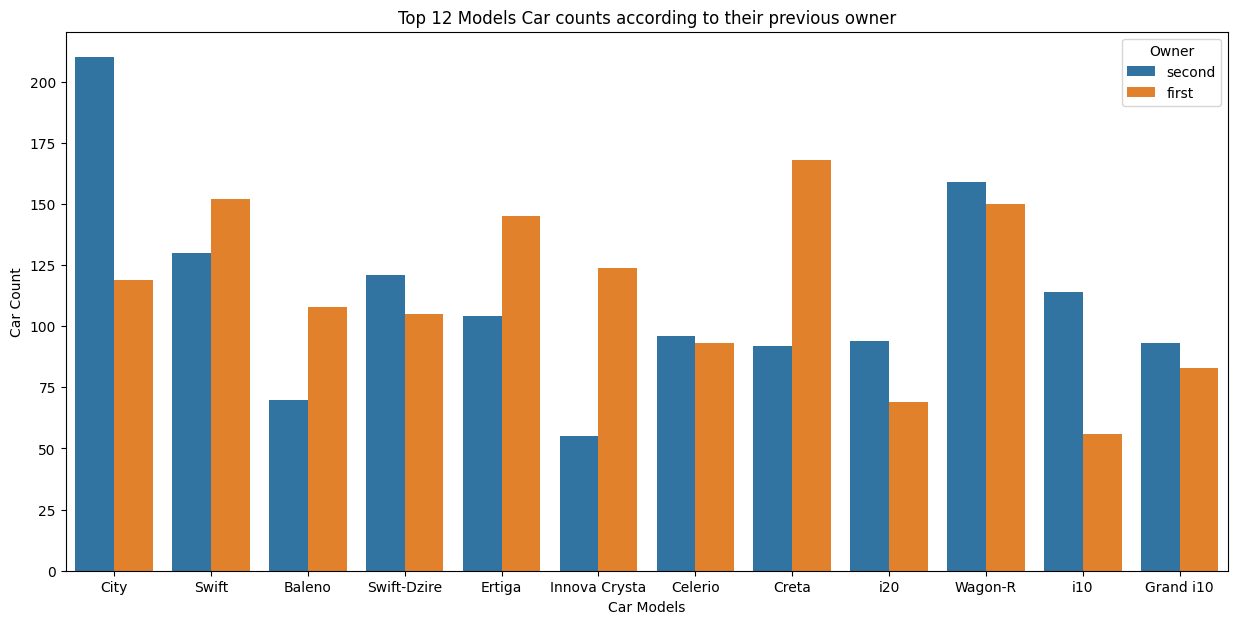

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = best_selling, x = 'model', hue = 'Owner' )
plt.title('Top 12 Models Car counts according to their previous owner')
plt.xlabel('Car Models')
plt.ylabel('Car Count')
plt.legend(title = 'Owner', loc = 'upper right')
plt.show()

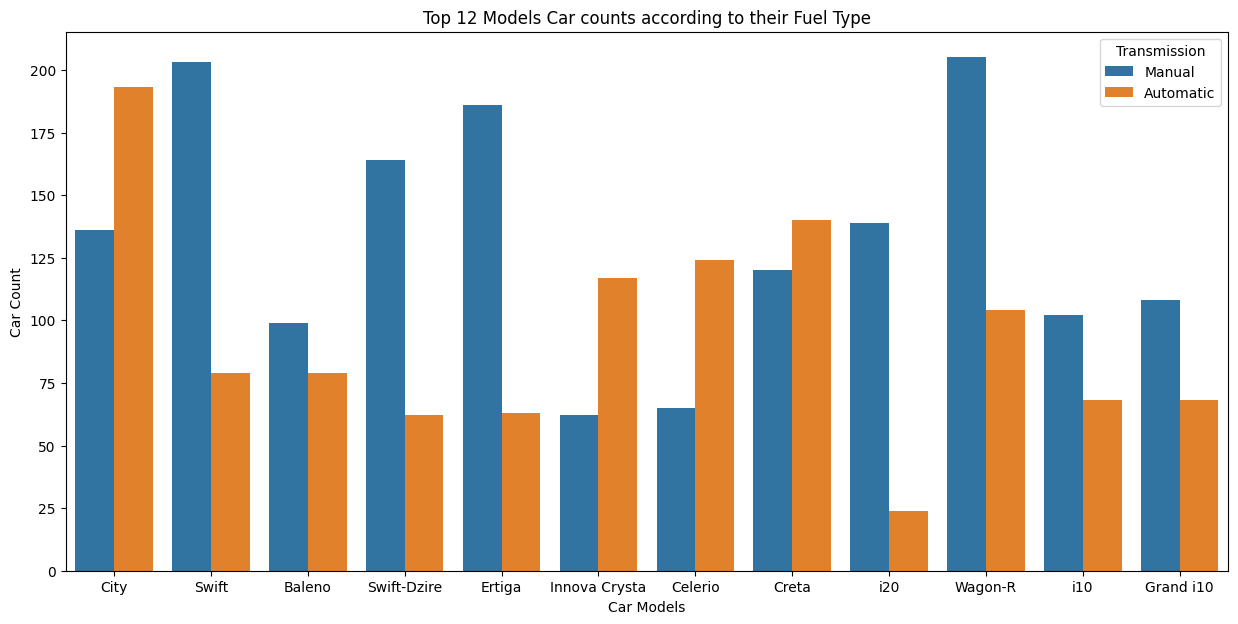

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = best_selling, x = 'model', hue = 'Transmission' )
plt.title('Top 12 Models Car counts according to their Fuel Type')
plt.xlabel('Car Models')
plt.ylabel('Car Count')
plt.legend(title = 'Transmission', loc = 'upper right')
plt.show()

Text(0, 0.5, 'Car Driven (in kms)')

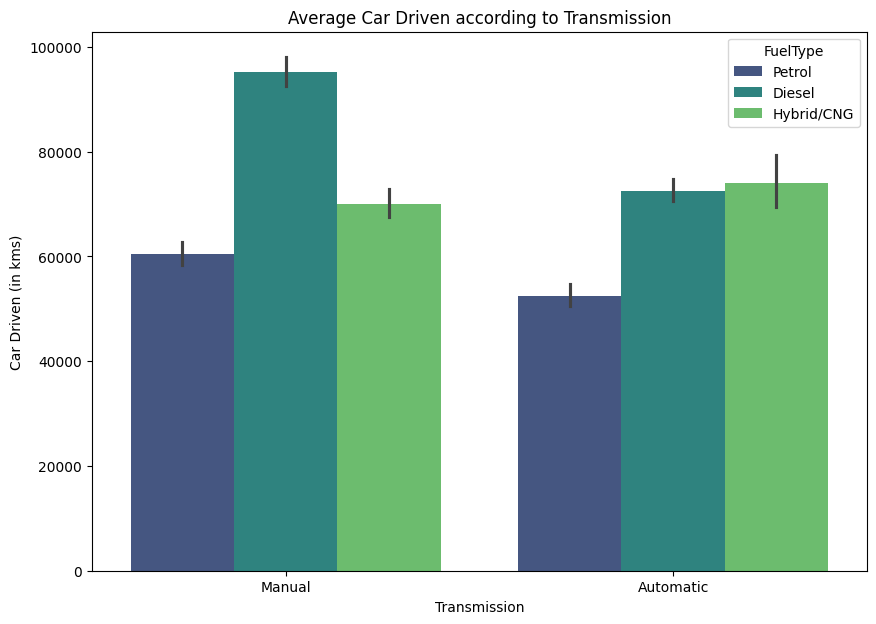

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(data = df, x = 'Transmission', y = 'Car Driven (in kms)',hue = 'FuelType', palette = 'viridis')
plt.title('Average Car Driven according to Transmission')
plt.xlabel('Transmission')
plt.ylabel('Car Driven (in kms)')

Text(0, 0.5, 'price (in lacs)')

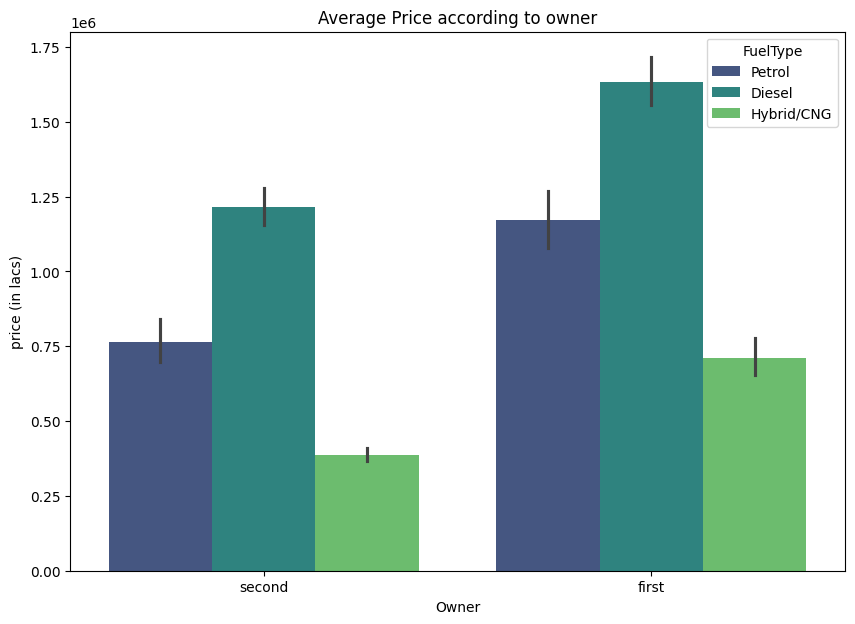

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(data = df, x = 'Owner', y = 'Ask Price',hue = 'FuelType', palette = 'viridis')
plt.title('Average Price according to owner')
plt.xlabel('Owner')
plt.ylabel('price (in lacs)')

Text(0, 0.5, 'price (in lacs)')

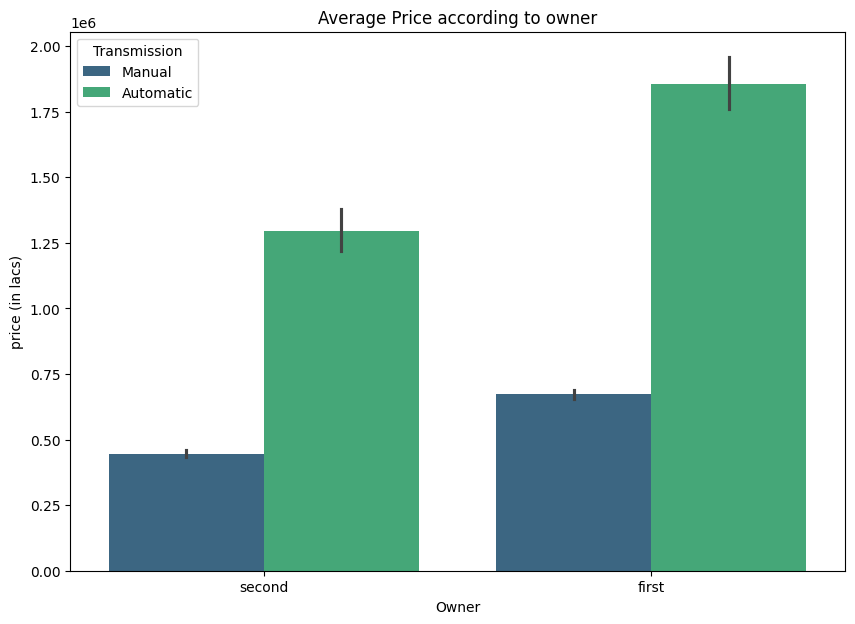

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(data = df, x = 'Owner', y = 'Ask Price',hue = 'Transmission', palette = 'viridis')
plt.title('Average Price according to owner')
plt.xlabel('Owner')
plt.ylabel('price (in lacs)')

<ipython-input-102-bf1ac99ef033>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Owner',y='Age',estimator='mean',errorbar=None,palette='viridis')


Text(0.5, 1.0, 'Average age of the car for first and second owner')

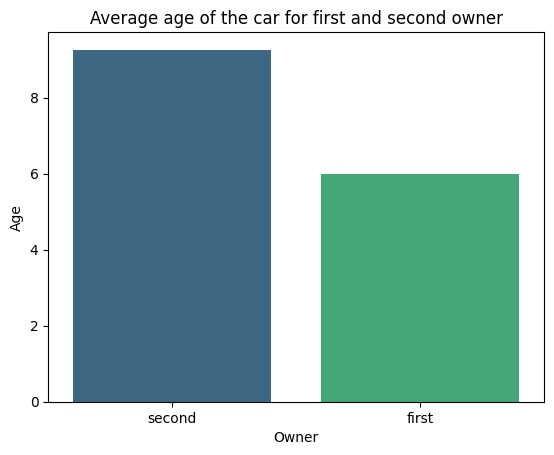

In [ ]:
sns.barplot(data=df, x='Owner',y='Age',estimator='mean',errorbar=None,palette='viridis')
plt.title('Average age of the car for first and second owner')
plt.xlabel('Owner')
plt.ylabel('Age of the Car')
plt.show()

Text(0.5, 1.0, 'Pair Plot ')

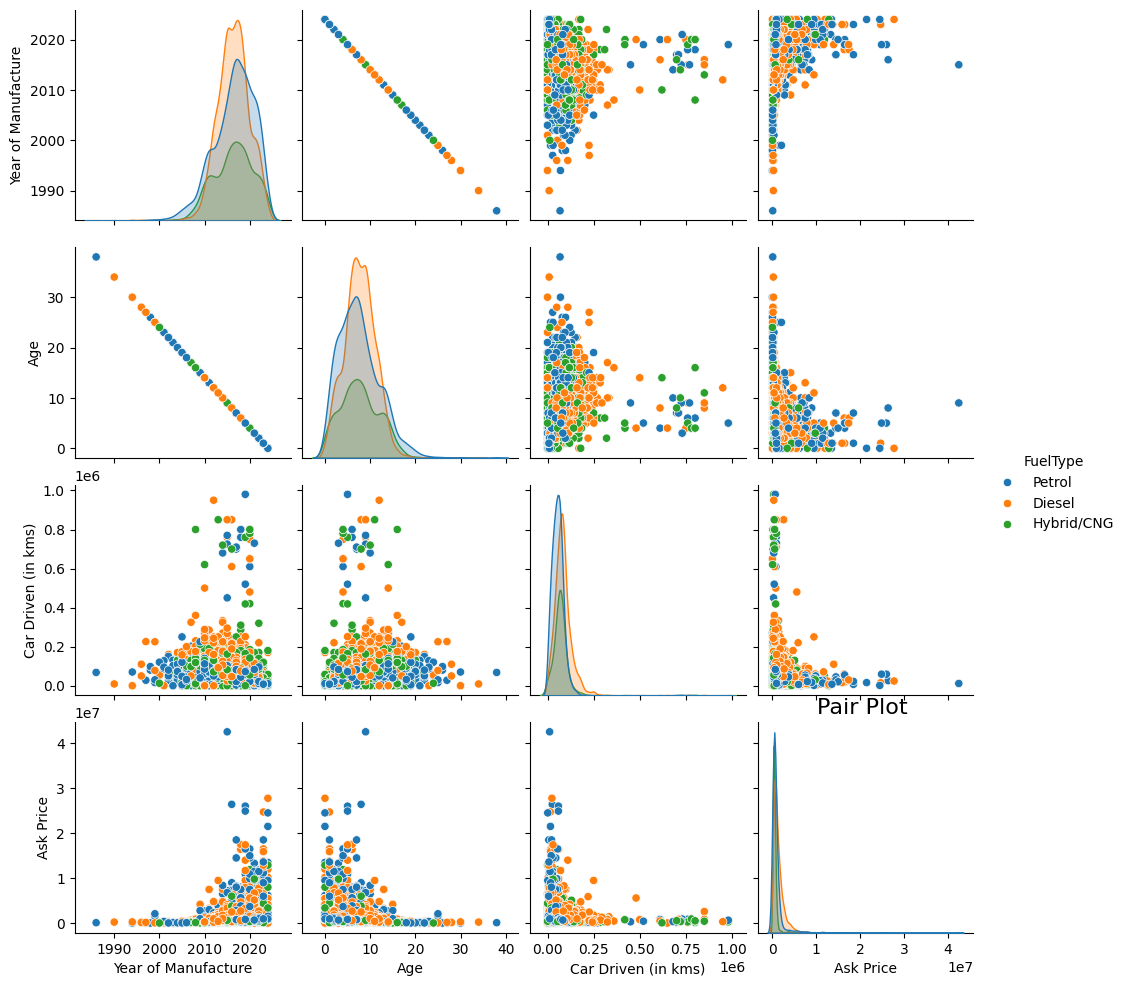

In [ ]:
sns.pairplot(df, hue = 'FuelType')
plt.title('Pair Plot ', fontsize = 16)

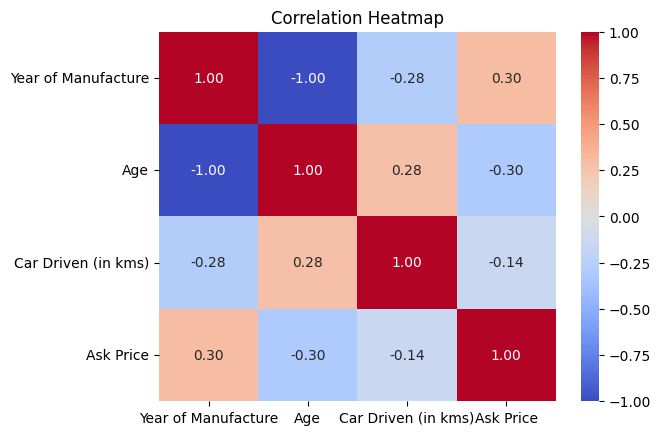

In [ ]:
heatmap_df = df.select_dtypes(include = ['number'])

sns.heatmap(heatmap_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()